# **PREDICTING ADMISSION USING DL REGRESSION**
## BAIM MOHAMED JALAL


### Objectives:
- We will create a deep learning regression model that predicts the likelihood
that a student applying to graduate school will be accepted based on various application factors (such as test scores).
- By analyzing the parameters in this graduate admissions dataset, we will use TensorFlow with Keras to create a regression model that can evaluate the chances of an applicant being admitted.

# **1- Importing Libraries**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
!pip install --user keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [109]:
!gdown 1FlEtcEYmopQmIwSG6fLZZcbXkv7UexQD

Downloading...
From: https://drive.google.com/uc?id=1FlEtcEYmopQmIwSG6fLZZcbXkv7UexQD
To: /content/admissions_data.csv
100% 16.2k/16.2k [00:00<00:00, 50.8MB/s]


# **2- Loading Data**

In [110]:
df = pd.read_csv('/content/admissions_data.csv')

In [111]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [112]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [113]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [114]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

# **3- Model**
## 1- Split features and label
- In our dataset, all variables are numerical.

- Our features are : GRE Score, TOEFL Score, University Rating, SOP: Statement of purpose, LOR: Letter of recommendation, CGPA: Undegraduate GPA, Research

- Our Label will be : Chance of admit


In [115]:
label = df.iloc[:,-1]
label

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [116]:
features = df.iloc[:,:-1]
features

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(features,label, train_size=0.2,random_state = 42)

### NB:
If we look through our dataset, we may notice that there are many different scales being used. For example, the GRE Score is out of 340 while the University Rating is out of 5.

So we need to use StandardScaler over the training set only so as to avoid data leakage.


In [118]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test =  pd.DataFrame(scaler.transform(X_test))
type(X_train)

pandas.core.frame.DataFrame

In [119]:
X_train
# Training set well scaled

,0,1,2,3,4,5,6,7
0,-0.328003,1.771239,1.980961,0.683288,1.578740,1.474356,1.711906,0.717741
1,0.249761,-0.156016,-1.221886,-0.924448,-0.445286,-1.033052,-0.000314,-1.393261
2,1.377444,-2.175044,-1.382028,-1.728316,-1.457299,-2.036015,-1.571159,-1.393261
3,-0.056523,-0.247790,-1.382028,-0.924448,-0.951292,-0.531570,0.675149,-1.393261
4,1.593235,0.302854,0.699822,-0.120580,-0.445286,0.471393,0.078228,0.717741
...,...,...,...,...,...,...,...,...
95,-1.065869,0.945272,0.539680,0.683288,1.072734,0.972874,0.957901,0.717741
96,0.075736,-1.165530,-0.421174,-0.924448,-0.951292,-0.531570,-0.550110,0.717741
97,0.618694,-1.532626,-1.382028,-1.728316,-1.457299,-1.534534,-2.073829,-1.393261
98,1.224302,-0.890208,-0.421174,-0.924448,-0.951292,0.471393,-1.398366,-1.393261


# 2- Creating our NN model
Our model will perform a regression analysis on the admission data, it will include:
- Hidden layers as how many neurons we have
- Activation functions
- Loss functions, and adequat metrics
- Gradient descent optimizer
- Learning rate

In [120]:
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [121]:
# Create the neural network model
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
# Compile the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss='mean_squared_error')

In [123]:
# Train the model
model.fit(X_train,y_train,epochs = 100, batch_size=32,verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7722
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4405
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2447
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1395
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0833
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0570
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0439
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0333
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0291
Epoch 13/100
4/4 [==============================] - 0s 5ms/s

In [124]:
# Evaluate the model on the test set
loss_score = model.evaluate(X_test, y_test)
print("Test loss",loss_score)

13/13 [==============================] - 0s 2ms/step - loss: 0.0144
Test loss 0.014398499391973019


## Conclusion:
Great! A test loss of 0.01296 indicates that our neural network model performed well on the regression task.

Let's adjust our model's parameters and try to make our model more accurate.

In [125]:
# Nb of epochs
nb_of_epoch=[50,300,500,800]
test_loss=[]
for n in nb_of_epoch:
  model.fit(X_train,y_train,epochs = n, batch_size=32,verbose=1)
  loss_score = model.evaluate(X_test, y_test)
  test_loss.append(loss_score)
print(test_loss)

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 7.6874e-04
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 6.9034e-04
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 6.5436e-04
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 6.5591e-04
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 6.2274e-04
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 6.3685e-04
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 6.6624e-04
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 5.8144e-04
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 7.2747e-04
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 6.7049e-04
Epoch 11/50
4/4 [==============================] - 0s 3ms/step - loss: 6.0277e-04
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 5.7599e-04
Epoch 13/50
4/4 [========

## Nb of epochs:
As we can see, More epochs require too much time in the training, but give better results.

In [126]:
# batch size :
batch = [32,64,128,256]
test_loss = []
for b in batch :
  model.fit(X_train,y_train,epochs = 200, batch_size=b,verbose=1)
  loss_score = model.evaluate(X_test, y_test)
  test_loss.append(loss_score)
print(test_loss)

Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 4.3053e-06
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 3.0566e-06
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 3.3112e-06
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 3.1063e-06
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 3.7760e-06
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 2.9622e-06
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 2.4852e-06
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2120e-06
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8294e-06
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 4.0080e-06
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 2.4499e-06
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 4.7680e-06
Epoch 13/200


## Batch size:
Batch size refers to the nb of samples processed together in each iteration,As we can see after 64 the loss doesn't change a lot, which means 64 can be the best batch size.

In [127]:
# Model
model.fit(X_train,y_train,epochs = 300, batch_size=64,verbose=1)
# Evaluate the model on the test set
loss_score = model.evaluate(X_test, y_test)
print("Test loss",loss_score)

Epoch 1/300
2/2 [==============================] - 0s 6ms/step - loss: 2.3809e-10
Epoch 2/300
2/2 [==============================] - 0s 6ms/step - loss: 2.5508e-10
Epoch 3/300
2/2 [==============================] - 0s 6ms/step - loss: 2.6919e-10
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 2.2986e-10
Epoch 5/300
2/2 [==============================] - 0s 10ms/step - loss: 2.6053e-10
Epoch 6/300
2/2 [==============================] - 0s 8ms/step - loss: 2.3779e-10
Epoch 7/300
2/2 [==============================] - 0s 10ms/step - loss: 2.3656e-10
Epoch 8/300
2/2 [==============================] - 0s 10ms/step - loss: 2.3241e-10
Epoch 9/300
2/2 [==============================] - 0s 9ms/step - loss: 2.2021e-10
Epoch 10/300
2/2 [==============================] - 0s 8ms/step - loss: 2.3051e-10
Epoch 11/300
2/2 [==============================] - 0s 7ms/step - loss: 2.2523e-10
Epoch 12/300
2/2 [==============================] - 0s 12ms/step - loss: 2.2828e-10
Epoch 13

# **4-Loss vs epoch**
Let's plot the model loss per epoch as well as the mean-average error per epoch for both training and validation data.

In [128]:
# Saving training history
model2 = Sequential()
model2.add(Dense(64,activation = 'relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1))
model2.add(Dense(1))
model2.compile(optimizer = Adam(learning_rate = 0.001), loss='mean_squared_error')
history = model2.fit(X_train,y_train,epochs = 250, batch_size=32,validation_data=(X_test, y_test),verbose=1)

Epoch 1/250
4/4 [==============================] - 2s 115ms/step - loss: 0.5235 - val_loss: 0.4441
Epoch 2/250
4/4 [==============================] - 0s 47ms/step - loss: 0.4456 - val_loss: 0.3713
Epoch 3/250
4/4 [==============================] - 0s 36ms/step - loss: 0.3670 - val_loss: 0.2993
Epoch 4/250
4/4 [==============================] - 0s 35ms/step - loss: 0.2905 - val_loss: 0.2284
Epoch 5/250
4/4 [==============================] - 0s 39ms/step - loss: 0.2149 - val_loss: 0.1620
Epoch 6/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1482 - val_loss: 0.1055
Epoch 7/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0929 - val_loss: 0.0671
Epoch 8/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0614 - val_loss: 0.0508
Epoch 9/250
4/4 [==============================] - 0s 35ms/step - loss: 0.0521 - val_loss: 0.0500
Epoch 10/250
4/4 [==============================] - 0s 40ms/step - loss: 0.0533 - val_loss: 0.0472
Epoch 11/250
4/4 [

In [129]:
# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

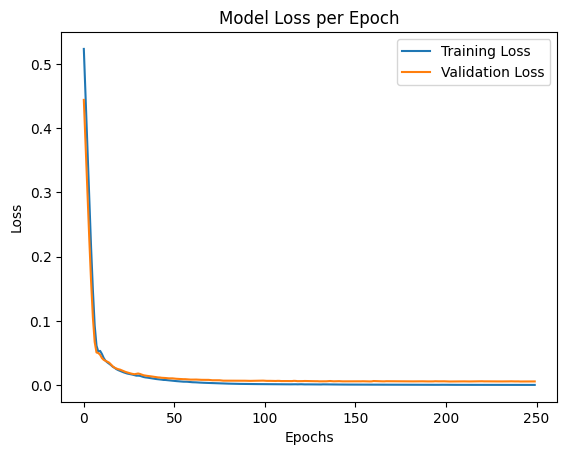

In [130]:
# Plot the model loss per epoch
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss per Epoch')
plt.legend()
plt.show()

# **5 - R² Score**

In [133]:
y_predicted = model2.predict(X_test)
print(r2_score(y_test, y_predicted))

13/13 [==============================] - 0s 2ms/step
0.7083769165586394


## ***Conclusion:***
Our R² score indicates that our regression model explains approximately 70.8% of the variance in the target variable.

However, there is still room for improvement, as there is a significant portion of the variance that remains unexplained.